# 패키지 로딩

In [2]:
from dbmodule import dbConnect, getData

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [3]:
#ST-327, ST-1680, ST-1556, ST-2999, ST-641, ST-1661, ST-936, ST-802, ST-959, ST-360, ST-1035, ST-470, ST-1670, ST-2437, ST-1140, ST-454, ST-1896, ST-812, ST-1276, ST-2667, ST-950, ST-1577, ST-1305, ST-620, ST-1270, ST-1521, ST-194, ST-624, ST-1887, ST-2177, ST-1938, ST-621, ST-702, ST-2343, ST-241, ST-2964, ST-815, ST-2430, ST-98, ST-765, ST-2447, ST-1277, ST-664, ST-811, ST-1615, ST-1403, ST-1224, ST-2786, ST-1660, ST-1178, ST-640, ST-1753, ST-359, ST-1791

# 파라매터 설정

In [4]:
bike_station_code = 'ST-327'
start_dt = ''
end_dt = '2024-04-09'

# DB 연결

In [5]:
# conn, cursor = dbConnect.dbconnect()

# df = getData.get_station_info_by_sbike_spot_id (conn, bike_station_code,start_dt, end_dt)

# conn.close()

In [6]:
conn, cursor = dbConnect.dbconnect()

df = getData.get_station_info_all(conn, start_dt, end_dt)

conn.close()

# 데이터 가공

In [7]:
# 시간 순서대로 정렬
df = df.sort_values("cur_time").reset_index(drop=True)

In [8]:
# POI013
df_POI013 = df[df["area_cd"] == "POI013"].reset_index(drop=True)
POI013_station = sorted(df_POI013["sbike_spot_id"].unique())

# 시각화

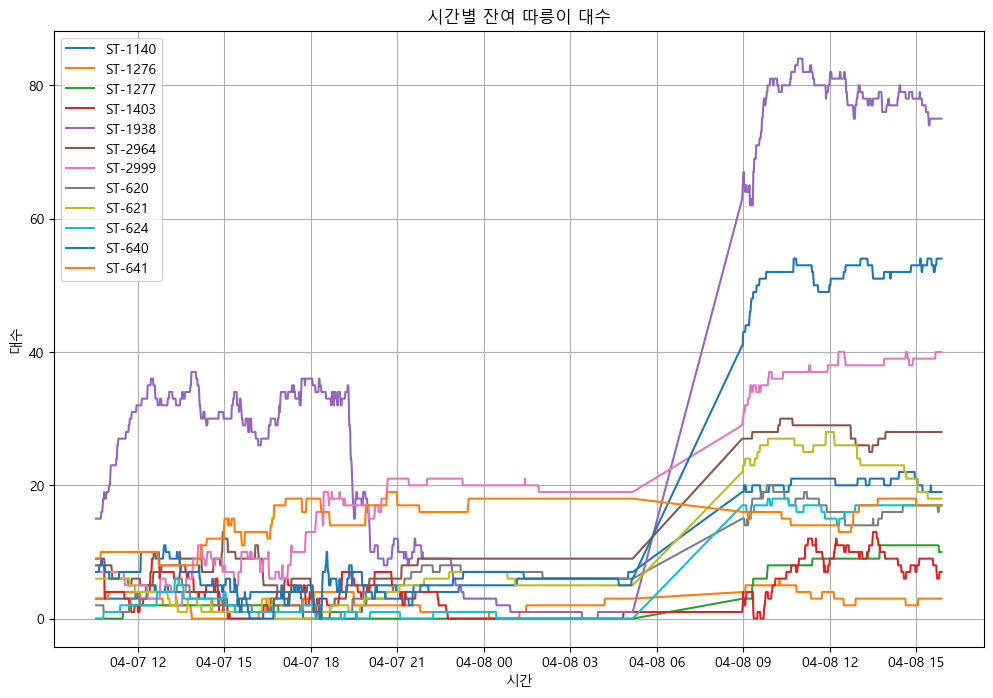

In [9]:
plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))

for station in POI013_station:
    
    temp_df = df_POI013[df_POI013["sbike_spot_id"] == station]
    
    plt.plot(temp_df["cur_time"], 
             temp_df["sbike_parking_cnt"],
             label = station)
    
plt.title('시간별 잔여 따릉이 대수')

plt.xlabel('시간')
plt.ylabel('대수')
plt.legend()
plt.grid()

plt.show()

- 2024-04-08 05:09:49.157 오류 발생 
- 2024-04-08 08:57:48.010 수집 재개

In [10]:
df_POI013[13379:13381]

,cur_time,area_cd,sbike_spot_id,sbike_parking_cnt,WEATHER_TIME,TEMP,SENSIBLE_TEMP,HUMIDITY,WIND_DIRCT,WIND_SPD,...,PPLTN_RATE_0,PPLTN_RATE_10,PPLTN_RATE_20,PPLTN_RATE_30,PPLTN_RATE_40,PPLTN_RATE_50,PPLTN_RATE_60,PPLTN_RATE_70,RESNT_PPLTN_RATE,NON_RESNT_PPLTN_RATE
13379,2024-04-08 05:09:49.157,POI013,ST-624,0,2024-04-08 05:00:00,11.9,11.9,36.0,E,1.4,...,0.4,2.4,17.7,24.0,18.4,17.7,13.1,6.3,58.2,41.8
13380,2024-04-08 08:57:48.010,POI013,ST-2999,29,2024-04-08 08:50:00,15.3,15.3,34.0,NNE,0.8,...,0.1,1.6,23.6,29.9,21.9,14.5,6.3,2.1,23.7,76.3
